In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/OCD Learning Data Collection/basket.csv')
data.head()

,web-scraper-order,web-scraper-start-url,Nom,Prix,Modèle
0,1744297982-1,https://sneakers123.com/sneaker/top-trends/page/2,New Balance,"98,00 €",2002R Fig
1,1744297982-2,https://sneakers123.com/sneaker/top-trends/page/2,Converse,32%,Chuck Taylor All Star 70 Hi
2,1744297982-3,https://sneakers123.com/sneaker/top-trends/page/2,Adidas,31%,Samba OG
3,1744297982-4,https://sneakers123.com/sneaker/top-trends/page/2,adidas,20%,Handball Spezial S
4,1744297982-5,https://sneakers123.com/sneaker/top-trends/page/2,Jordan,50%,1 Retro Ajko SP Union


In [4]:
data.tail()

,web-scraper-order,web-scraper-start-url,Nom,Prix,Modèle
1053,1744297982-1054,https://sneakers123.com/sneaker/top-trends/page/2,adidas,59%,Adifom Climacool Wonder
1054,1744297982-1055,https://sneakers123.com/sneaker/top-trends/page/2,Adidas,31%,Forum 84
1055,1744297982-1056,https://sneakers123.com/sneaker/top-trends/page/2,Adidas,"220,00 €",4DFWD 4
1056,1744297982-1057,https://sneakers123.com/sneaker/top-trends/page/2,Nike,"65,00 €",Dunk Light
1057,1744297982-1058,https://sneakers123.com/sneaker/top-trends/page/2,Nike,"84,00 €",UGG Classic Ultra Mini Platform 42


In [6]:
data.drop(['web-scraper-order', "web-scraper-start-url"], axis=1, inplace=True)
data

,Nom,Prix,Modèle
0,New Balance,"98,00 €",2002R Fig
1,Converse,32%,Chuck Taylor All Star 70 Hi
2,Adidas,31%,Samba OG
3,adidas,20%,Handball Spezial S
4,Jordan,50%,1 Retro Ajko SP Union
...,...,...,...
1053,adidas,59%,Adifom Climacool Wonder
1054,Adidas,31%,Forum 84
1055,Adidas,"220,00 €",4DFWD 4
1056,Nike,"65,00 €",Dunk Light


In [8]:
data.dtypes

,0
Nom,object
Prix,object
Modèle,object


In [13]:
data['Prix'] = data['Prix'].str.replace('%', '€', regex=False)
data.head()

,Nom,Prix,Modèle
0,New Balance,"98,00 €",2002R Fig
1,Converse,32€,Chuck Taylor All Star 70 Hi
2,Adidas,31€,Samba OG
3,adidas,20€,Handball Spezial S
4,Jordan,50€,1 Retro Ajko SP Union


Convertir la colonne prix en float

In [14]:
data['Prix'] = data['Prix'].str.replace('€', '', regex=False)
data.head()

,Nom,Prix,Modèle
0,New Balance,"98,00",2002R Fig
1,Converse,32,Chuck Taylor All Star 70 Hi
2,Adidas,31,Samba OG
3,adidas,20,Handball Spezial S
4,Jordan,50,1 Retro Ajko SP Union


In [16]:
data['Prix'] = data['Prix'].str.replace(' ', '', regex=False)
data['Prix'] = data['Prix'].str.replace(',', '.', regex=False)
data["Prix"] = data["Prix"].astype(float)
data.dtypes

,0
Nom,object
Prix,float64
Modèle,object


In [17]:
data.head()

,Nom,Prix,Modèle
0,New Balance,98.0,2002R Fig
1,Converse,32.0,Chuck Taylor All Star 70 Hi
2,Adidas,31.0,Samba OG
3,adidas,20.0,Handball Spezial S
4,Jordan,50.0,1 Retro Ajko SP Union


In [18]:
data.isnull().sum()

,0
Nom,0
Prix,0
Modèle,0


In [19]:
data.duplicated().sum()

np.int64(41)

In [20]:
data.describe()

,Prix
count,1058.000000
mean,59.234556
std,53.963496
min,7.000000
25%,29.250000
50%,45.000000
75%,69.990000
max,747.000000


In [21]:
data.head()

,Nom,Prix,Modèle
0,New Balance,98.0,2002R Fig
1,Converse,32.0,Chuck Taylor All Star 70 Hi
2,Adidas,31.0,Samba OG
3,adidas,20.0,Handball Spezial S
4,Jordan,50.0,1 Retro Ajko SP Union


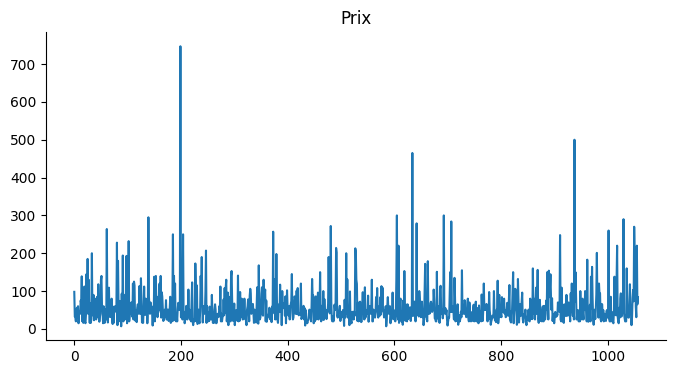

In [30]:
# @title Prix

from matplotlib import pyplot as plt
data['Prix'].plot(kind='line', figsize=(8, 4), title='Prix')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
data["Concat"] = data["Nom"] + " " + data["Modèle"]
data.head()

,Nom,Prix,Modèle,Concatener,Concat
0,New Balance,98.0,2002R Fig,New Balance 2002R Fig,New Balance 2002R Fig
1,Converse,32.0,Chuck Taylor All Star 70 Hi,Converse Chuck Taylor All Star 70 Hi,Converse Chuck Taylor All Star 70 Hi
2,Adidas,31.0,Samba OG,Adidas Samba OG,Adidas Samba OG
3,adidas,20.0,Handball Spezial S,adidas Handball Spezial S,adidas Handball Spezial S
4,Jordan,50.0,1 Retro Ajko SP Union,Jordan 1 Retro Ajko SP Union,Jordan 1 Retro Ajko SP Union


In [24]:
data.drop("Concatener", inplace=True, axis=1)
data.head()

,Nom,Prix,Modèle,Concat
0,New Balance,98.0,2002R Fig,New Balance 2002R Fig
1,Converse,32.0,Chuck Taylor All Star 70 Hi,Converse Chuck Taylor All Star 70 Hi
2,Adidas,31.0,Samba OG,Adidas Samba OG
3,adidas,20.0,Handball Spezial S,adidas Handball Spezial S
4,Jordan,50.0,1 Retro Ajko SP Union,Jordan 1 Retro Ajko SP Union


In [27]:
data.shape

(1058, 4)

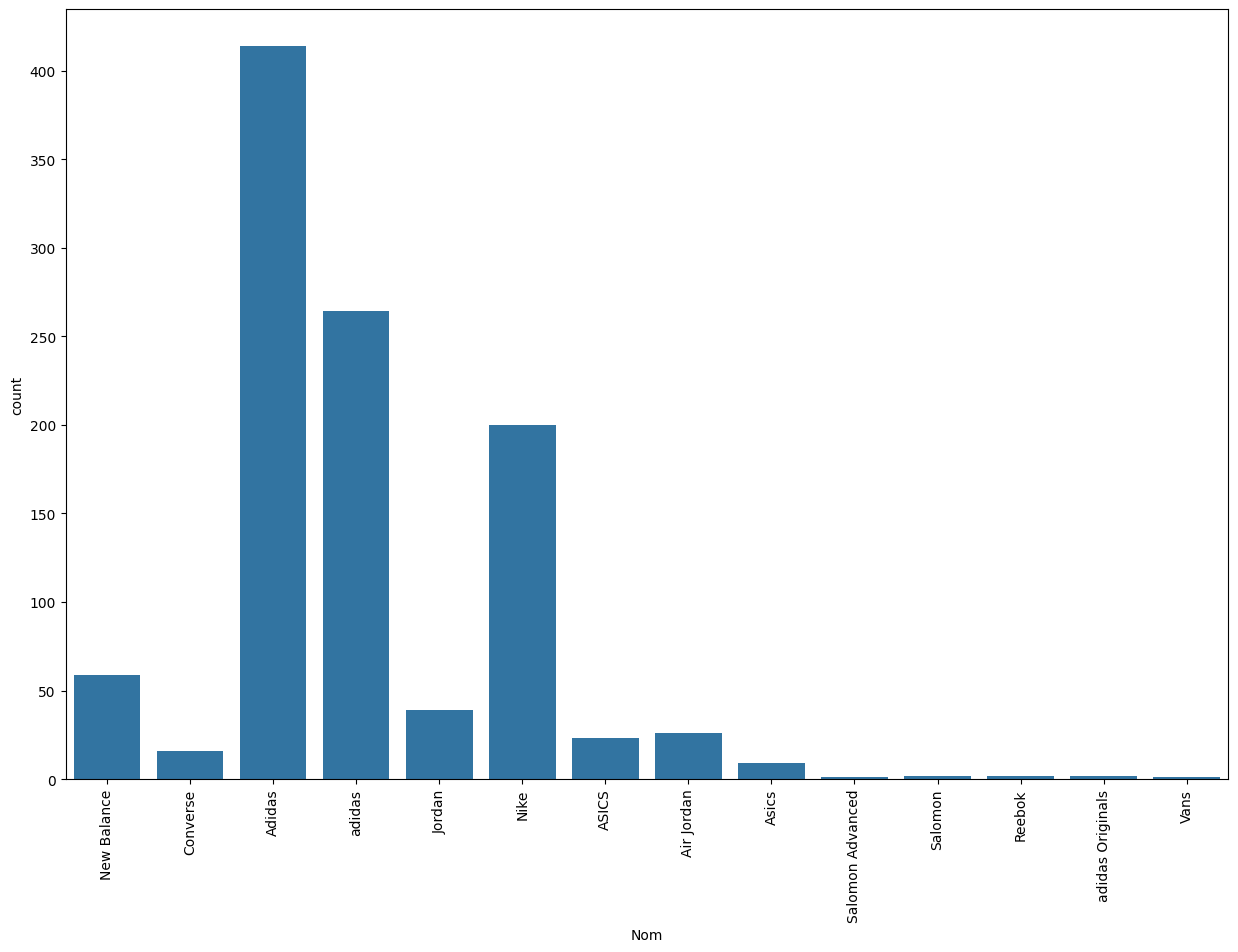

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x="Nom")
plt.xticks(rotation=90)
plt.show()

In [26]:
data.to_csv('/content/drive/MyDrive/OCD Learning Data Collection/basket1.csv', index=False)